In [1]:
import random
from collections import defaultdict



import math
from collections import defaultdict
import random

def calculate_etx(distance, p_succ):
    """Calculate ETX based on the distance between nodes."""
    return round((p_succ), 2)

def euclidean_distance(x1, y1, x2, y2):
    """Calculate Euclidean distance between two points."""
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def generate_random_graph(num_nodes, min_neighbors, max_neighbors, max_distance):
    
    graph = defaultdict(dict)
    
    
    node_positions = []
    for _ in range(num_nodes):
        x = random.uniform(0, max_distance)
        y = random.uniform(0, max_distance)
        node_positions.append((x, y))
    for node in range(num_nodes - 1):
        distance = euclidean_distance(*node_positions[node], *node_positions[node + 1])
        p_succ = random.uniform(1,1.5)
        etx = calculate_etx(distance, p_succ)
        power_consumption = round(random.uniform(1, 5), 2)
        graph[node][node + 1] = [etx, power_consumption]

    for node in range(num_nodes):
        num_neighbors = random.randint(min_neighbors, max_neighbors)
        neighbors = random.sample(range(num_nodes), num_neighbors)

        for neighbor in neighbors:
            if neighbor != node and neighbor not in graph[node]:
                distance = euclidean_distance(*node_positions[node], *node_positions[neighbor])
                p_succ = random.uniform(1,1.5)  # Introduce variability in the probability of successful transmission
                etx = calculate_etx(distance, p_succ)
                power_consumption = round(random.uniform(1, 5), 2)
                graph[node][neighbor] = [etx, power_consumption]

    return graph


# Example usage
num_nodes = 10
min_neighbors = 2
max_neighbors = 5
max_distance = 100

graph = generate_random_graph(num_nodes, min_neighbors, max_neighbors, max_distance)


def get_neighbor_distance(graph, node_i, node_j):
    if node_j in graph[node_i]:
        etx, _ = graph[node_i][node_j]
        return etx
    else:
        raise ValueError(f"Nodes {node_i} and {node_j} are not neighbors.")
def get_neighbor_power(graph, node_i, node_j):
    if node_j in graph[node_i]:
        _, power = graph[node_i][node_j]
        return power
    else:
        raise ValueError(f"Nodes {node_i} and {node_j} are not neighbors.")



# Print the generated graph

def generate_reverse_graph(graph):
    reverse_graph = {node: {} for node in graph.keys()}

    for node, neighbors in graph.items():
        for neighbor, edge_data in neighbors.items():
            reverse_graph[neighbor][node] = edge_data

    return reverse_graph

def generate_modified_graph(original_graph):
    #original_graph = generate_random_graph(num_nodes, min_neighbors, max_neighbors)
    new_graph = defaultdict(dict)

    for node, neighbors in original_graph.items():
        for neighbor, edge_data in neighbors.items():
            etx, power_consumption = edge_data
            new_etx = etx + power_consumption / 100
            new_power_consumption = power_consumption
            new_graph[node][neighbor] = [new_etx, new_power_consumption]

    return new_graph


reverse_graph = generate_reverse_graph(graph)

new_graph = generate_modified_graph(graph)


# Print the generated reverse graph
print("\ngraph:")
for node, neighbors in graph.items():
    print(f"Node {node}:")
    for neighbor, edge_data in neighbors.items():
        print(f"  -> {neighbor}, ETX: {edge_data[0]}, Power consumption: {edge_data[1]}")
print("\nnew graph:")

for node, neighbors in new_graph.items():
    print(f"Node {node}:")
    for neighbor, edge_data in neighbors.items():
        print(f"  -> {neighbor}, ETX: {edge_data[0]}, Power consumption: {edge_data[1]}")
print("\nreverse graph:")

for node, neighbors in reverse_graph.items():
    print(f"Node {node}:")
    for neighbor, edge_data in neighbors.items():
        print(f"  -> {neighbor}, ETX: {edge_data[0]}, Power consumption: {edge_data[1]}")
    



graph:
Node 0:
  -> 1, ETX: 1.24, Power consumption: 4.29
  -> 5, ETX: 1.35, Power consumption: 3.9
  -> 7, ETX: 1.01, Power consumption: 2.13
Node 1:
  -> 2, ETX: 1.2, Power consumption: 1.06
  -> 5, ETX: 1.34, Power consumption: 2.88
Node 2:
  -> 3, ETX: 1.1, Power consumption: 1.24
  -> 6, ETX: 1.29, Power consumption: 3.84
  -> 8, ETX: 1.32, Power consumption: 2.87
  -> 1, ETX: 1.43, Power consumption: 1.14
  -> 4, ETX: 1.19, Power consumption: 4.79
Node 3:
  -> 4, ETX: 1.26, Power consumption: 1.47
  -> 2, ETX: 1.14, Power consumption: 2.48
  -> 0, ETX: 1.47, Power consumption: 3.61
Node 4:
  -> 5, ETX: 1.01, Power consumption: 1.97
  -> 3, ETX: 1.33, Power consumption: 1.55
  -> 6, ETX: 1.17, Power consumption: 1.36
  -> 2, ETX: 1.03, Power consumption: 4.29
Node 5:
  -> 6, ETX: 1.39, Power consumption: 3.47
  -> 3, ETX: 1.35, Power consumption: 3.4
  -> 0, ETX: 1.03, Power consumption: 4.0
  -> 4, ETX: 1.15, Power consumption: 3.79
  -> 1, ETX: 1.27, Power consumption: 1.45
Nod

In [2]:
import heapq

def dijkstra(graph, source, destination):
    min_heap = [(0, source)]
    visited = set()
    nodes = list(graph.keys()) + [neighbor for neighbors in graph.values() for neighbor in neighbors]
    unique_nodes = list(set(nodes))
    distances = {node: float('inf') for node in unique_nodes}
    distances[source] = 0
    previous = {node: None for node in unique_nodes}

    while min_heap:
        current_distance, current_node = heapq.heappop(min_heap)

        if current_node in visited:
            continue

        visited.add(current_node)

        if current_node == destination:
            break

        for neighbor, edge_data in graph[current_node].items():
            distance = current_distance + edge_data[0]
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current_node
                heapq.heappush(min_heap, (distance, neighbor))

    path = []
    if destination not in previous:
        raise ValueError(f"No path exists between nodes {source} and {destination}")

    current = destination
    while current is not None:
        path.append(current)
        current = previous[current]

    path = path[::-1]

    return distances[destination], path


source_node = 0
destination_node = 0
distance, path = dijkstra(graph, source_node, destination_node)

print(f"Shortest path between nodes {source_node} and {destination_node} (ETX as cost metric):")
print(f"  Distance: {distance}")
print(f"  Path: {path}")

srate = 1
totalp = 0
for i in range(len(path)-1):
    srate=srate*(1/get_neighbor_distance(graph, path[i],path[i+1]))
    totalp= totalp+get_neighbor_power(graph, path[i],path[i+1])
def get_srate(path, graph):
    srate = 1
    for i in range(len(path)-1):
        srate=srate*(1/get_neighbor_distance(graph, path[i],path[i+1]))
    return srate
def get_power(path,graph):
    totalp = 0
    for i in range(len(path)-1):
        totalp= totalp+get_neighbor_power(graph, path[i],path[i+1])
    return totalp

    
    



Shortest path between nodes 0 and 0 (ETX as cost metric):
  Distance: 0
  Path: [0]


In [3]:
def shortest_anypath_first(graph, d):
    V = list(graph.keys())

    Di = defaultdict(lambda: float('inf'))
    Fi = defaultdict(set)
    
    #Dj = defaultdict(lambda: float('inf'))
    Di[d] = 0
    S = set()
    Q = [(0, d)]# Priority queue with (cost, node) tuple

    

    while Q:
        cost, j = heapq.heappop(Q)
        #print(j,"hh")
        if j not in S:
            S.add(j)
            #J = defaultdict(set)
            for i, edge_data in graph[j].items():
                #etx = edge_data[0]
                diJ = 1  # ETX value from the graph
                J = Fi[i] | {j}
                #print(j,"n is ",i)
                power =[]
                tmp = []
                for k in S:
                    if k in J:
                        diJ = diJ*(1-1/get_neighbor_distance(graph, k, i))
                    
                        power.append(get_neighbor_distance(graph, k, i))
                #print(diJ, "ni gan ma")
                power.reverse()
                    
    
                numerator = 0
                for k in range(len(power)):
                    if k==0:
                        cur = power[k]
                        power[k] = 1/power[k]
                        for m in J:
                            #print(cur,"cur", get_neighbor_distance(graph, m, i))
                            
                            if get_neighbor_distance(graph, m, i)==cur:
                                numerator = numerator + Di[m]*power[k]
                    else:
                        cur = power[k]
                        power[k] = (1-power[k-1])*(1/power[k])
                        #print(cur,"cur", get_neighbor_distance(graph, m, i))
                        for m in J:
                            if get_neighbor_distance(graph, m, i)==cur:
                                numerator = numerator + Di[m]*power[k]
                 #   print(power[k], len(power))
                #print(numerator,"nn")
                total = round(1/(1-diJ)+(numerator)/(1-diJ),2)
                #for x in S:
                 #   total = total+get_neibhbor_distance(graph, x,i)
                

                if Di[i] > total:
                    Di[i] = total
                    Fi[i] = J
                    #print(total, "and ",i)
                    #print(J)
                heapq.heappush(Q, (Di[i], i))

                


    return Di, Fi




# Run the SHORTEST-ANYPATH-FIRST algorithm with the destination node set to 0
destination_node = 0
Di, Fi = shortest_anypath_first(reverse_graph, destination_node)

# Print the results
for node, cost in Di.items():
    print(f"Node {node}: Di = {cost}, Fi = {Fi[node]}")




Node 0: Di = 0, Fi = set()
Node 3: Di = 1.47, Fi = {0}
Node 5: Di = 1.03, Fi = {0}
Node 1: Di = 2.37, Fi = {5}
Node 4: Di = 2.04, Fi = {5}
Node 6: Di = 2.43, Fi = {5}
Node 2: Di = 2.56, Fi = {1, 3}
Node 7: Di = 2.68, Fi = {1, 3}
Node 8: Di = 3.5, Fi = {4}
Node 9: Di = 3.81, Fi = {7}


In [4]:
def modified_shortest_anypath_first(graph, d):
    V = list(graph.keys())

    Di = defaultdict(lambda: float('inf'))
    Fi = defaultdict(set)
    
    #Dj = defaultdict(lambda: float('inf'))
    Di[d] = 0
    S = set()
    Q = [(0, d)]# Priority queue with (cost, node) tuple

    

    while Q:
        cost, j = heapq.heappop(Q)
        #print(j,"hh")
        if j not in S:
            S.add(j)
            #J = defaultdict(set)
            for i, edge_data in graph[j].items():
                #etx = edge_data[0]
                diJ = 1  # ETX value from the graph
                J = Fi[i] | {j}
                #print(j,"n is ",i)
                power =[]
                tmp = []
                for k in S:
                    if k in J:
                        diJ = diJ*(1-1/get_neighbor_distance(graph, k, i))
                    
                        power.append(get_neighbor_distance(graph, k, i))
                #print(diJ, "ni gan ma")
                power.reverse()
                    
    
                numerator = 0
                for k in range(len(power)):
                    if k==0:
                        cur = power[k]
                        power[k] = 1/power[k]
                        for m in J:
                            #print(cur,"cur", get_neighbor_distance(graph, m, i))
                            
                            if get_neighbor_distance(graph, m, i)==cur:
                                numerator = numerator + Di[m]*power[k]
                    else:
                        cur = power[k]
                        power[k] = (1-power[k-1])*(1/power[k])
                        #print(cur,"cur", get_neighbor_distance(graph, m, i))
                        for m in J:
                            if get_neighbor_distance(graph, m, i)==cur:
                                numerator = numerator + Di[m]*power[k]
                 #   print(power[k], len(power))
                #print(numerator,"nn")
                total = 1/(1-diJ)+(numerator)/(1-diJ) 
                for x in S:
                    if x in J:
                        total = round(total,2)++get_neighbor_power(graph, x,i)/1000
                

                if Di[i] > total:
                    Di[i] = total
                    Fi[i] = J
                    #print(total, "and ",i)
                    #print(J)
                heapq.heappush(Q, (Di[i], i))

                


    return Di, Fi




# Run the SHORTEST-ANYPATH-FIRST algorithm with the destination node set to 0
destination_node = 0
Di, Fi = modified_shortest_anypath_first(reverse_graph, destination_node)

# Print the results
for node, cost in Di.items():
    print(f"Node {node}: Di = {cost}, Fi = {Fi[node]}")




Node 0: Di = 0, Fi = set()
Node 3: Di = 1.4736099999999999, Fi = {0}
Node 5: Di = 1.034, Fi = {0}
Node 1: Di = 2.3728800000000003, Fi = {5}
Node 4: Di = 2.04197, Fi = {5}
Node 6: Di = 2.43196, Fi = {5}
Node 2: Di = 2.56124, Fi = {1, 3}
Node 7: Di = 2.69273, Fi = {1, 3}
Node 8: Di = 3.50132, Fi = {4}
Node 9: Di = 3.8213999999999997, Fi = {7}


In [5]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [6]:
class Station:
    def __init__(self, value, fwtb=None, accesstime =0):
        self.value = value
        self.fwtb = fwtb if fwtb is not None else set()
        self.accesstime = accesstime
        self.power = 0

    def add_fw(self, fw):
        self.fwtb.add(fw)
    def inc_ac():
        self.accesstime = self.accesstime + 1
    def __repr__(self):
        return f"Node({self.value})"
    def send(self):
        self.accesstime = self.accesstime + 1
        for d in self.fwtb:          
            if self.fwtb!=set():
                self.power = self.power+get_neighbor_power(graph,self.value,d.value)
            if (random.uniform(0, 1)<= (1/get_neighbor_distance(graph,self.value, d.value))):
                d.send()
                break
        if (self.fwtb == set()) and self.accesstime>1:
            self.accesstime=1
    def h_send(self):
        self.accesstime = self.accesstime + 1
        for d in self.fwtb:          
            if self.fwtb!=set():
                self.power = self.power+get_neighbor_power(graph,self.value,d.value)
            if (random.uniform(0, 1)<= (1/get_neighbor_distance(graph,self.value, d.value))):
                d.send()
                #break

        if (self.fwtb == set()) and self.accesstime>1:
            self.accesstime=1
                


    def clear_time(self):
        self.accesstime = 0
    def get_power(self):
        return self.power
                

def nwk(F):
    #if station_list is None:
    station_list = []

    for z in range(len(F)):
        station_list.append(Station(value=z))
        #print(z)

    for z in station_list:
        for x in F[z.value]:
            #print(x)
            z.add_fw(station_list[x])
    return station_list



#s = nwk(Fi)

#for i in s:
 #   print(i.value,i.fwtb)

    
#while(s[len(s)-1].accesstime!=1):
 #   s[0].send()
    
#for i in s:
 #   print(i.value,i.accesstime)
def send_packet(path, graph):
  

    packet = 1
    power = 0
    for i in range(len(path)-1):
        power = power + get_neighbor_power(graph,path[i],path[i+1])
        noise = random.uniform(0, 1)
        #print(path[i],path[i+1])
        if noise >= 1/(get_neighbor_distance(graph,path[i], path[i+1])):
            packet = 0
        
    return packet,power

#grading algorithm
def grading(node, Forwarding_set):
    #grade are set as 0 since the smaller the etx the better
    grade = 0
    #for node i in node's forwardng set
    for i in Forwarding_set[node]:
        #grade = sum of all etx value from node to all other nodes in forwarding set
        grade = grade - get_neighbor_power(graph,node, i)
        

    #have a average value
    return grade/len(Forwarding_set[node])
    


    




    
    

    
    


In [7]:
import time


#single path power and pdr
avg_single = []
power_single=[]

#anypath power and pdr
avg_any = []

power_any=[]
#boardcasting power and pdr
power_b= []
avg_b =[]



#opt-anypath based-coop with grading power and pdr
avg_com = []
power_com = []

#optimization hierachy anypath power and pdr
avg_mdf = []
power_mdf = []

#coop-boardcasting anypath based power and pdr
avg_mb = []
power_mb =[]

#for each network density
for i in [50,100,200,300,400,500]:
    dr= 0
    ar=0

    #generate graph and run shortest path, anypath, and anypath algorithm to generate shortest path path,
    #Fi forwarding set of anypath, and forwarding set Fo for anypath with hieracrchy

    graph = generate_random_graph(i,1,15,1000)
    distance, path = dijkstra(graph, 0, i-1) 
    reverse_graph = generate_reverse_graph(graph)

    Di, Fi = shortest_anypath_first(reverse_graph,i-1 )
    Do,Fo = modified_shortest_anypath_first(reverse_graph, i-1)
    
    
    #run grading algorithm for the optimized coop boardcasting algo with anypath based
    Combined = defaultdict(set)
    for i0 in range(len(Fi)):
        Combined[i0]=Fi[i0]
        
        
    sh = defaultdict(set)
    for x0 in range(len(Fi)):
        sh[x0]=Fi[x0]
    
    eec = defaultdict(set)
    for x1 in range(len(Fo)):
        eec[x1]=Fo[x1]
    
    grade= 0
    g = []
    
    #for node in shorest path expect the destination
    for j0 in range(0,len(path)-1):
        #gd = current node's grade
        gd = grading(j0,Fi)
        #accmulate all grade of node in it's forwarding set
        grade = grade + gd
        g.append(gd)
    #expected grade for the entire shortest path
    grade = grade/(len(path)-1)
    #for node in shortest path
    for i1 in range(len(path)-1):
        #if grade of current node < expected grade
        if g[i1] <= grade:
            #forwarding set only contain next hop in shortest path
            Combined[path[i1]] = {path[i1+1]}
    
    #anypath
    s = nwk(Fi)
    #anypath-coop
    h = nwk(sh)
    #enegery-enhanced any
    m = nwk(Fo)
    #enegery-enhanced coop
    ec = nwk(eec)
    #grading-energy combined
    c = nwk(Combined)

    #send 10000 packets for each network conditions
    iteration = 10000
    # rate recorder
    ratio = 0
    r_any = 0
    r_com =0
    r_mdf = 0
    r_b = 0
    r_mb = 0
    
    
    #power recorder
    pd=0
    pa=0
    pc= 0
    pm=0
    pb = 0
    pmb = 0
    
    #run iteration
    while iteration !=0:
        pkt, pw = send_packet(path, graph)
        ratio = ratio + pkt
        pd = pd + pw
        #single and any
        s[0].send()
        m[0].send()
        #opt-coop-any-grading
        c[0].h_send()

        #boardcast
        h[0].h_send()
        ec[0].h_send()
        
        #record packet recived at dest node
        r_any = r_any+s[len(s)-1].accesstime
        r_com = r_com + c[len(c)-1].accesstime
        r_mdf = r_mdf + m[len(m)-1].accesstime
        r_b = r_b+h[len(h)-1].accesstime
        r_mb = r_mb + ec[len(ec)-1].accesstime
        
        #empty dest node packet recived
        s[len(s)-1].clear_time()
        c[len(c)-1].clear_time()
        m[len(m)-1].clear_time()
        h[len(h)-1].clear_time()
        ec[len(ec)-1].clear_time()

        iteration= iteration -1
    
    #sum power used  for the entire network
    for l in s:
        pa = pa+l.get_power()
    for cb in c:
        pc=pc+cb.get_power()
    for mb in m:
        pm = pm+mb.get_power()
    for h1 in h:
        pb = pb +h1.get_power()
    for ec1 in ec:
        pmb = pmb + ec1.get_power()
        
    #pkt recived/packet send
    avg_single.append(ratio/10000)
    avg_any.append(r_any/10000)
    avg_com.append(r_com/10000)
    avg_mdf.append(r_mdf/10000)
    
    avg_b.append(r_b/10000)
    avg_mb.append(r_mb/10000)
    
    #add power consumption
    power_single.append(pd)
    power_any.append(pa)
    power_com.append(pc)
    power_mdf.append(pm)
    power_b.append(pb)
    power_mb.append(pmb)


    
    
    
    #initialization
    graph = defaultdict(dict)
    path  = []
    distance = 0







 
    
        
for i in range(len(avg_single)):
    print ("single path avg ratio = ",avg_single[i], "any path avg ratio = ", avg_any[i],"hybrid avg = ",avg_com[i],"with node number =",i+6)
    print("single path power used =", power_single[i], "any path power used =",power_any[i],"hybrid power = ",power_com[i], "with node number =", i+6)


single path avg ratio =  0.8428 any path avg ratio =  0.9226 hybrid avg =  0.8431 with node number = 6
single path power used = 61500.00000000999 any path power used = 64522.039999990186 hybrid power =  57879.91999998933 with node number = 6
single path avg ratio =  0.6353 any path avg ratio =  0.773 hybrid avg =  0.8511 with node number = 7
single path power used = 97100.00000001569 any path power used = 115919.53000000364 hybrid power =  171454.95999999935 with node number = 7
single path avg ratio =  0.6742 any path avg ratio =  0.7909 hybrid avg =  0.9483 with node number = 8
single path power used = 54300.000000002634 any path power used = 58793.93000000282 hybrid power =  113654.5499999997 with node number = 8
single path avg ratio =  0.6582 any path avg ratio =  0.6808 hybrid avg =  0.882 with node number = 9
single path power used = 50100.00000000244 any path power used = 51285.63999999198 hybrid power =  129630.7500000001 with node number = 9
single path avg ratio =  0.5253 an

In [8]:
#plt.plot(x_values, power_any, marker='o', linestyle='--', label='anypath')

#plt.plot(x_values, power_single, marker='o', linestyle='-', label='dijkstra')

#plt.plot(x_values, power_b, marker='o', linestyle='-', label='anypath-coop')

#plt.plot(x_values, power_mb, marker='o', linestyle='-', label='anypath-coop-eng-eff')

#plt.plot(x_values, power_com, marker='o', linestyle='-', label='grading-any')

#plt.plot(x_values, power_mdf, marker='o', linestyle='-', label='any-eng-eff')

6 6
0.8851833333333333 0.7756500000000001 0.6509833333333334 0.8136333333333333


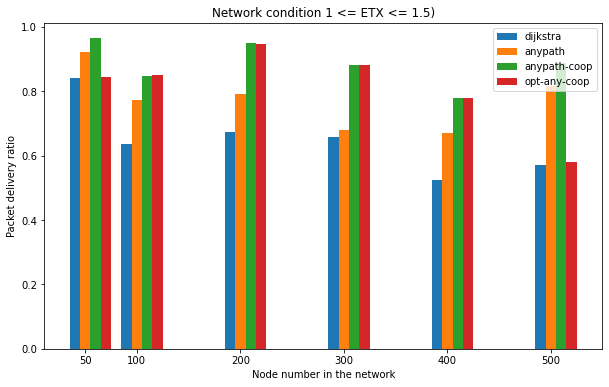

In [11]:
import matplotlib.pyplot as plt
import numpy as np

print(len(avg_single), len(avg_any))

x_values = [50, 100, 200, 300, 400, 500]
bar_width = 10

# Calculate bar positions
bar1_positions = [x - bar_width for x in x_values]
bar2_positions = x_values
bar3_positions = [x + bar_width for x in x_values]
bar4_positions = [x + 2 * bar_width for x in x_values]

plt.figure(figsize=(10, 6))

plt.bar(bar1_positions, avg_single, width=bar_width, label='dijkstra')
plt.bar(bar2_positions, avg_any, width=bar_width, label='anypath')
plt.bar(bar3_positions, avg_b, width=bar_width, label='anypath-coop')
plt.bar(bar4_positions, avg_com, width=bar_width, label='opt-any-coop')

print(sum(avg_b) / 6, sum(avg_any) / 6, sum(avg_single) / 6, sum(avg_com) / 6)

plt.title('Network condition 1 <= ETX <= 1.5)')
plt.xlabel('Node number in the network')
plt.ylabel('Packet delivery ratio')

plt.xticks(x_values)

plt.legend()
plt.savefig('bar_plot.pdf')
plt.show()

plt.close()


6 6
149646.51000000173 87117.93166666654 72116.66666666984 127507.26166666712


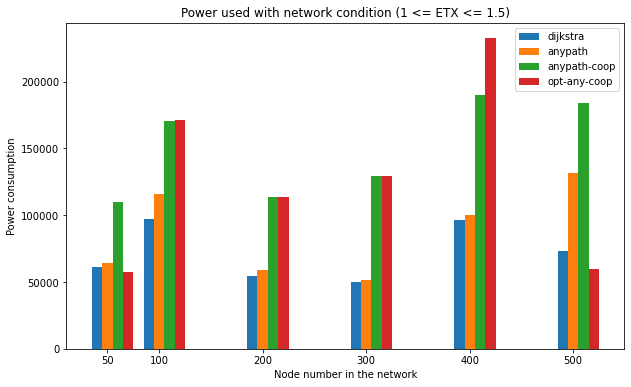

In [12]:
import matplotlib.pyplot as plt
import numpy as np

print(len(power_single), len(power_any))

x_values = [50, 100, 200, 300, 400, 500]
bar_width = 10

# Calculate bar positions
bar1_positions = [x - bar_width for x in x_values]
bar2_positions = x_values
bar3_positions = [x + bar_width for x in x_values]
bar4_positions = [x + 2 * bar_width for x in x_values]

plt.figure(figsize=(10, 6))

plt.bar(bar1_positions, power_single, width=bar_width, label='dijkstra')
plt.bar(bar2_positions, power_any, width=bar_width, label='anypath')
plt.bar(bar3_positions, power_b, width=bar_width, label='anypath-coop')
plt.bar(bar4_positions, power_com, width=bar_width, label='opt-any-coop')

print(sum(power_b) / 6, sum(power_any) / 6, sum(power_single) / 6, sum(power_com)/6)

plt.title('Power used with network condition (1 <= ETX <= 1.5)')
plt.xlabel('Node number in the network')
plt.ylabel('Power consumption')

plt.xticks(x_values)

plt.legend()
plt.savefig('power_bar_plot.pdf')
plt.show()

plt.close()
